In [2]:
# Import libries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import lightgbm as lgb
from scipy import stats
from matplotlib.gridspec import GridSpec
from collections import Counter
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification




In [3]:
# Import dataframes AND Specify a custom delimiter for the CSV input (sep=' ')

red_df=pd.read_csv(r'C:\Users\jspad\Documents\Code Academy\Data Bases\winequality-red.csv', sep=';')
white_df=pd.read_csv(r'C:\Users\jspad\Documents\Code Academy\Data Bases\winequality-white.csv',sep=';')

In [4]:
# Checking null values

red_df.isnull().sum()
white_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
red_df.head(15)
white_df.sort_values(['quality'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3307,9.4,0.24,0.29,8.5,0.037,124.0,208.0,0.99395,2.90,0.38,11.0,3
445,7.1,0.32,0.32,11.0,0.038,16.0,66.0,0.99370,3.24,0.40,11.5,3
2050,11.8,0.23,0.38,11.1,0.034,15.0,123.0,0.99970,2.93,0.55,9.7,3
3810,6.8,0.26,0.34,15.1,0.060,42.0,162.0,0.99705,3.24,0.52,10.5,3
3409,6.2,0.23,0.35,0.7,0.051,24.0,111.0,0.99160,3.37,0.43,11.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
774,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
827,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
876,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
820,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9


In [6]:
#creating new column

red_df['quality_label']= red_df['quality'].apply(lambda value: 'low' 
if value <= 5 else 'medium'
if value <=6 else 'high')

white_df['quality_label']= white_df['quality'].apply(lambda value: 'low' 
if value <= 5 else 'medium'
if value <=6 else 'high')



In [7]:
# transforming these labels into categrical data type

red_df['quality_label'] = pd.Categorical(red_df['quality_label'],
categories=['low', 'medium', 'high'])

white_df['quality_label'] = pd.Categorical(white_df['quality_label'],
categories=['low', 'medium', 'high'])

In [8]:
# Combine the two datasets into wines.

red_df['wine_type'] = 'red'
white_df['wine_type'] = 'white'

wines = pd.concat([red_df, white_df])

In [9]:
# Re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=43).reset_index(drop=True)

wines


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,6.9,0.30,0.36,4.50,0.054,31.0,203.0,0.99513,3.40,0.57,10.4,4,low,white
1,9.0,0.40,0.43,2.40,0.068,29.0,46.0,0.99430,3.20,0.60,12.2,6,medium,red
2,7.6,0.17,0.45,11.20,0.054,56.0,137.0,0.99700,3.15,0.47,10.0,5,low,white
3,6.6,0.29,0.39,6.75,0.031,22.0,98.0,0.99130,3.15,0.80,12.9,7,high,white
4,6.1,0.28,0.22,1.80,0.034,32.0,116.0,0.98980,3.36,0.44,12.6,6,medium,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,5.0,0.33,0.18,4.60,0.032,40.0,124.0,0.99114,3.18,0.40,11.0,6,medium,white
6493,6.4,0.24,0.31,2.80,0.038,41.0,114.0,0.99155,3.37,0.66,11.7,7,high,white
6494,5.6,0.25,0.26,3.60,0.037,18.0,115.0,0.99040,3.42,0.50,12.6,6,medium,white
6495,7.4,0.35,0.31,17.95,0.062,42.0,187.0,1.00020,3.27,0.64,9.1,5,low,white


In [10]:
comparative_df= pd.concat([red_df.describe(), white_df.describe()], axis='columns', keys=['Red Wine', 'White Wine'])

comparative_df.head()

Red Wine                                                            \
      fixed acidity volatile acidity  citric acid residual sugar    chlorides   
count   1599.000000      1599.000000  1599.000000    1599.000000  1599.000000   
mean       8.319637         0.527821     0.270976       2.538806     0.087467   
std        1.741096         0.179060     0.194801       1.409928     0.047065   
min        4.600000         0.120000     0.000000       0.900000     0.012000   
25%        7.100000         0.390000     0.090000       1.900000     0.070000   

                                                                          \
      free sulfur dioxide total sulfur dioxide      density           pH   
count         1599.000000          1599.000000  1599.000000  1599.000000   
mean            15.874922            46.467792     0.996747     3.311113   
std             10.460157            32.895324     0.001887     0.154386   
min              1.000000             6.000000     0.990070     2.740000   
25%              7.000000            22.000000     0.995600     3.210000   

                    ...   White Wine                              \
         sulphates  ...  citric acid residual sugar    chlorides   
count  1599.000000  ...  4898.000000    4898.000000  4898.000000   
mean      0.658149  ...     0.334192       6.391415     0.045772   
std       0.169507  ...     0.121020       5.072058     0.021848   
min       0.330000  ...     0.000000       0.600000     0.009000   
25%       0.550000  ...     0.270000       1.700000     0.036000   

                                                                          \
      free sulfur dioxide total sulfur dioxide      density           pH   
count         4898.000000          4898.000000  4898.000000  4898.000000   
mean            35.308085           138.360657     0.994027     3.188267   
std             17.007137            42.498065     0.002991     0.151001   
min              2.000000             9.000000     0.987110     2.720000   
25%             23.000000           108.000000     0.991723     3.090000   

                                              
         sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  
mean      0.489847    10.514267     5.877909  
std       0.114126     1.230621     0.885639  
min       0.220000     8.000000     3.000000  
25%       0.410000     9.500000     5.000000  

[5 rows x 24 columns]

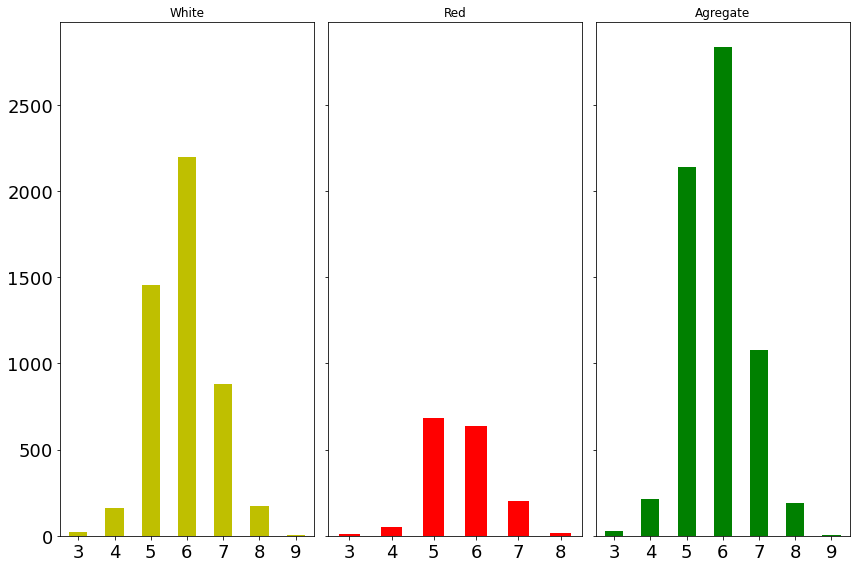

In [11]:
# Vinho Verde Quality Class Distribution

quality_sort=pd.Categorical([3,4,5,6,7,8,9], ordered=True)

figure, axes = plt.subplots(1, 3, figsize=(12, 8), sharey=True)
plt.subplots_adjust(hspace=.0)
q=pd.DataFrame(data=(wines['quality'].value_counts().sort_index(level=quality_sort)))
qred=pd.DataFrame(data=(red_df['quality'].value_counts().sort_index(level=quality_sort)))
qwhite=pd.DataFrame(data=(white_df['quality'].value_counts().sort_index(level=quality_sort)))

qred.plot(ax=axes[1], kind='bar', rot=0, fontsize=18, legend=None, color='r'); axes[1].set_title('Red')
qwhite.plot(ax=axes[0], kind='bar', rot=0, fontsize=18, legend=None, color='y'); axes[0].set_title('White')
q.plot(ax=axes[2], y="quality", kind="bar", rot=0, fontsize=18, legend=None, color='g').set_title('Agregate');

#figure.suptitle('Vinho Verde Quality Class Distribution');
plt.tight_layout()

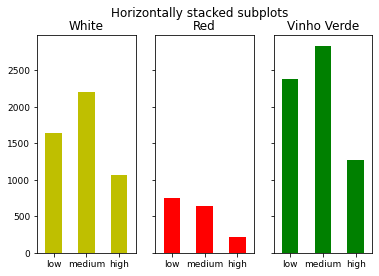

In [12]:
# Plot to show the distribution of qualities

label_sort=pd.Categorical(['low', 'medium', 'high'], ordered=True)

qred=pd.DataFrame(data=(red_df['quality_label'].value_counts().sort_index(level=label_sort)))
qwhite=pd.DataFrame(data=(white_df['quality_label'].value_counts().sort_index(level=label_sort)))
quality=pd.DataFrame(data=(wines['quality_label'].value_counts().sort_index(level=label_sort)))

figure, axes = plt.subplots(1, 3, sharey=True)
plt.subplots_adjust(hspace=.0)
qwhite.plot(ax=axes[0], kind='bar', rot=0, fontsize=9, legend=None, color='y'); axes[0].set_title('White')
qred.plot(ax=axes[1], kind='bar', rot=0, fontsize=9, legend=None, color='r'); axes[1].set_title('Red')
quality.plot(ax=axes[2], y="quality_label", kind="bar", rot=0, fontsize=9, legend=None, color='g').set_title('Vinho Verde');
figure.suptitle('Horizontally stacked subplots');

In [13]:
# Alcohol level vary significantly among the low quality, medium quality and high quality wines?

F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['alcohol'],
wines[wines['quality_label'] == 'medium']['alcohol'],
wines[wines['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: 936.9233871275493 	p-value: 0.0


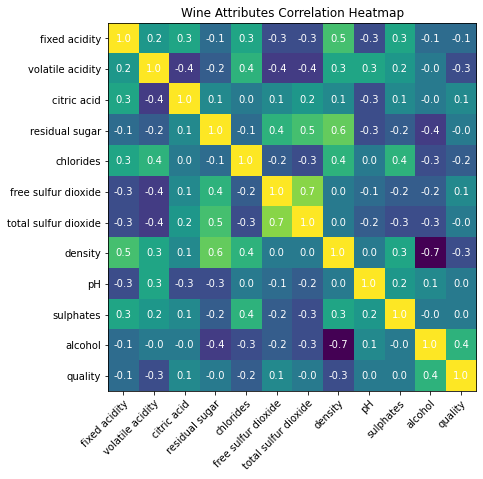

In [14]:
# Wine Attributes Correlation Heatmap

wines_colums = ["fixed acidity", "volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
wines_corr = np.around(wines.corr(method='pearson', min_periods=1).to_numpy(), decimals=1)

fig, ax = plt.subplots()
im = ax.imshow(wines_corr)

# We want to show all ticks...
ax.set_xticks(np.arange(len(wines_colums)))
ax.set_yticks(np.arange(len(wines_colums)))
# # ... and label them with the respective list entries
ax.set_xticklabels(wines_colums)
ax.set_yticklabels(wines_colums)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(wines_colums)):
    for j in range(len(wines_colums)):
        text = ax.text(j, i, wines_corr[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Wine Attributes Correlation Heatmap")
fig.tight_layout()
fig.set_figheight(100)
plt.show()


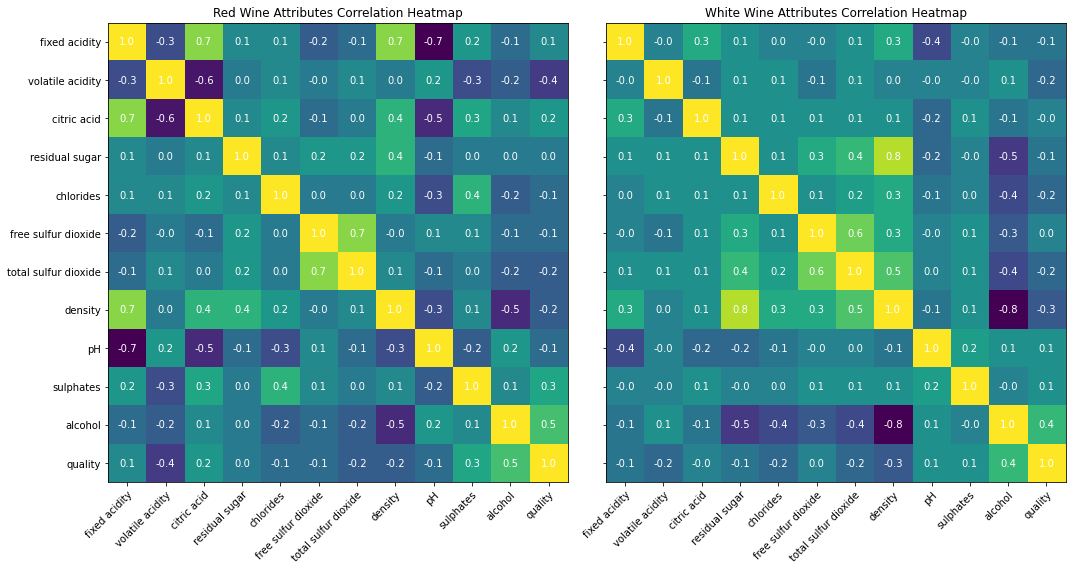

In [15]:
# Comparative Attributes Correlation Heatmap - Red/White
 
wines_colums = ["fixed acidity", "volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
red_corr = np.around(red_df.corr(method='pearson', min_periods=1).to_numpy(), decimals=1)
white_corr = np.around(white_df.corr(method='pearson', min_periods=1).to_numpy(), decimals=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

im1 = ax1.imshow(red_corr)
ax1.set_xticks(np.arange(len(wines_colums)))
ax1.set_yticks(np.arange(len(wines_colums)))
ax1.set_xticklabels(wines_colums)
ax1.set_yticklabels(wines_colums)
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(len(wines_colums)):
    for j in range(len(wines_colums)):
        text = ax1.text(j, i, red_corr[i, j],
                       ha="center", va="center", color="w")
ax1.set_title("Red Wine Attributes Correlation Heatmap")

im2 = ax2.imshow(white_corr)
ax2.set_xticks(np.arange(len(wines_colums)))
ax2.set_yticks(np.arange(len(wines_colums)))
ax2.set_xticklabels(wines_colums)
ax2.set_yticklabels(wines_colums)
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(len(wines_colums)):
    for j in range(len(wines_colums)):
        text = ax2.text(j, i, white_corr[i, j],
                       ha="center", va="center", color="w")
ax2.set_title("White Wine Attributes Correlation Heatmap")



fig.tight_layout()
#fig.set_figheight(100)
plt.show()

In [16]:
# ML Model Setup

# Relevant Variables: 

# A. According Data Exploring:
#    1. Residual Sugar
#    X. Density - Rindondante
#    2. Alcohol
#    3. Free SO2

# B. According Modeling and Futures importance:
#    1. Volatile acidity
#    2. Chlorides
#    3. Free sulfur dioxide
#    4. Alcohol

# C. Other? (tutte tranne le rindondanti - Empirio insegna?)


# Models:
# X. Linear Regretion
# 2. KNN - Nearest Neighbor Algorithms
# 3. Random Forest
# 4. Lightgbm Booster
# 5. Xg Booster(?)
# 6. NAIVE BAYES


# Treat Data:
# 1. Split data --> Train vs Test
# 2. Scale data: Robust scaler (with outliers) 
# 3. Scale data: Standard scaler

# ML Application
# 1. Red/White Predition --> R/W
# 2. Label Prediction
# 3. Label RED Pred
# 4. Label White Pred
# X. Class Prediction ---> Bad idea!!


In [17]:
# 1. Split Data R/W

# from sklearn.model_selection import train_test_split
# from collections import Counter

X = wines.iloc[:, lambda df: [3, 5, 7, 10]]
var_names = X.columns
y = np.array(wines['wine_type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=wines.wine_type)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))


Counter({'white': 3428, 'red': 1119}) Counter({'white': 1470, 'red': 480})
Features: ['residual sugar', 'free sulfur dioxide', 'density', 'alcohol']


In [18]:
# 2. Scale Data

#from sklearn.preprocessing import RobustScaler

rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)


In [19]:
# Model: Linear Regretion R/W

#from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)



LogisticRegression()

In [20]:
# Prediction R/W

pred_wines_rw_lr = lr.predict(X_test)
print(pred_wines_rw_lr.shape) #checking the shape of between Target and Test
print(y_test.shape)

(1950,)
(1950,)


In [21]:
# Results R/W Linear Regretion with Calssification Report + Confution Matrix + Cohen-Kappa Score

# from sklearn.metrics import classification_report

print(classification_report(y_test,pred_wines_rw_lr, target_names=['red', 'white']))

print(confusion_matrix(y_test,pred_wines_rw_lr))

print("Percentage of accurancy of the model with Cohen-Kappa score is: ", (cohen_kappa_score(y_test,pred_wines_rw_lr))*100, "%")




              precision    recall  f1-score   support

         red       0.95      0.93      0.94       480
       white       0.98      0.99      0.98      1470

    accuracy                           0.97      1950
   macro avg       0.96      0.96      0.96      1950
weighted avg       0.97      0.97      0.97      1950

[[ 444   36]
 [  22 1448]]
Percentage of accurancy of the model with Cohen-Kappa score is:  91.90605006655503 %


In [22]:
# # Model: Logic Regretion Label

# X = wines.iloc[:, lambda df: [3, 5, 7, 10]]
# var_names = X.columns
# y = np.array(wines['quality_label'])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=wines.quality_label)

# print(Counter(y_train), Counter(y_test))
# print('Features:', list(var_names))

# rs=RobustScaler()

# X_train = rs.fit_transform(X_train)
# X_test = rs.fit_transform(X_test)

# lr = LogisticRegression()
# lr.fit(X_train, y_train)

# pred_wines_label_lr= lr.predict(X_test)
# print(pred_wines_label_lr.shape) 
# print(y_test.shape)


# print(classification_report(y_test,pred_wines_label_lr, target_names=['high', 'low', 'medium']))
# print(confusion_matrix(y_test,pred_wines_label_lr))
# print("Percentage of accurancy of the model with Cohen-Kappa score is: ", (cohen_kappa_score(y_test,pred_wines_label_lr))*100, "%")

In [23]:
# Model: KNN R/W

#from sklearn.neighbors import KNeighborsClassifier

X = wines.iloc[:, lambda df: [1, 4, 5, 10]]
var_names = X.columns
y = np.array(wines['wine_type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.wine_type)

rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=15, algorithm='kd_tree')
knn.fit(X_train, y_train)

pred_wines_rw_neigh= knn.predict(X_test)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_wines_rw_neigh.shape)
print(y_test.shape)

print(metrics.classification_report(y_test,knn.predict(X_test)))
print(confusion_matrix(y_test,pred_wines_rw_neigh))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_wines_rw_neigh)))
print('Training accuracy: {:.4f}'.format(knn.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(knn.score(X_test,y_test)))



Counter({'white': 4408, 'red': 1439}) Counter({'white': 490, 'red': 160})
Features: ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'alcohol']
(650,)
(650,)
              precision    recall  f1-score   support

         red       0.94      0.95      0.94       160
       white       0.98      0.98      0.98       490

    accuracy                           0.97       650
   macro avg       0.96      0.96      0.96       650
weighted avg       0.97      0.97      0.97       650

[[152   8]
 [ 10 480]]
Cohen-Kappa score:  0.9256954147084974
Training accuracy: 0.9678
Testing accuracy: 0.9723


In [24]:
# Model: KNN Label

X = wines.iloc[:, lambda df: [1, 4, 5, 10]]
var_names = X.columns
y = np.array(wines['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.quality_label)


rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=15, algorithm='kd_tree')
knn.fit(X_train, y_train)

pred_wines_label_neigh= knn.predict(X_test)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_wines_label_neigh.shape)
print(y_test.shape)

print(metrics.classification_report(y_test,knn.predict(X_test)))
print(confusion_matrix(y_test,pred_wines_label_neigh))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_wines_label_neigh)))
print('Training accuracy: {:.4f}'.format(knn.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(knn.score(X_test,y_test)))


Counter({'medium': 2552, 'low': 2146, 'high': 1149}) Counter({'medium': 284, 'low': 238, 'high': 128})
Features: ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'alcohol']
(650,)
(650,)
              precision    recall  f1-score   support

        high       0.60      0.51      0.55       128
         low       0.66      0.69      0.67       238
      medium       0.58      0.60      0.59       284

    accuracy                           0.61       650
   macro avg       0.61      0.60      0.60       650
weighted avg       0.61      0.61      0.61       650

[[ 65  10  53]
 [  4 165  69]
 [ 39  76 169]]
Cohen-Kappa score:  0.3873312954854409
Training accuracy: 0.6400
Testing accuracy: 0.6138


In [45]:
# Model: KNN Label ex2

from sklearn.preprocessing import StandardScaler
X = wines.iloc[:, lambda df: [1, 4, 5, 10]]
var_names = X.columns
y = np.array(wines['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.quality_label)


# rs=RobustScaler()
# X_train = rs.fit_transform(X_train)
# X_test = rs.fit_transform(X_test)

stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=15, algorithm='kd_tree')
knn.fit(X_train, y_train)

pred_wines_label_neigh= knn.predict(X_test)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_wines_label_neigh.shape)
print(y_test.shape)

print(metrics.classification_report(y_test,knn.predict(X_test)))
print(confusion_matrix(y_test,pred_wines_label_neigh))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_wines_label_neigh)))
print('Training accuracy: {:.4f}'.format(knn.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(knn.score(X_test,y_test)))


Counter({'medium': 2552, 'low': 2146, 'high': 1149}) Counter({'medium': 284, 'low': 238, 'high': 128})
Features: ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'alcohol']
(650,)
(650,)
              precision    recall  f1-score   support

        high       0.62      0.52      0.56       128
         low       0.65      0.71      0.68       238
      medium       0.60      0.59      0.60       284

    accuracy                           0.62       650
   macro avg       0.62      0.61      0.61       650
weighted avg       0.62      0.62      0.62       650

[[ 66  13  49]
 [  5 170  63]
 [ 36  80 168]]
Cohen-Kappa score:  0.4004274625970229
Training accuracy: 0.6350
Testing accuracy: 0.6215


In [55]:
# EX 3 Naive Bayes

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

X = wines.iloc[:, lambda df: [1, 4, 5, 10]]
var_names = X.columns
y = np.array(wines['quality_label'])

#X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.quality_label)


stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

mltnb = make_pipeline(TfidfVectorizer(), MultinomialNB())

gnb = GaussianNB()
pred_wines_label_gnb = gnb.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != pred_wines_label_gnb).sum()))

cm = confusion_matrix(y_test, pred_wines_label_gnb)
ac = accuracy_score(y_test,pred_wines_label_gnb)

cm

# print(Counter(y_train), Counter(y_test))
# print('Features:', list(var_names))

# print(pred_wines_label_gnb.shape)
# print(y_test.shape)

# print(metrics.classification_report(y_test,gnb.predict(X_test)))
# print(confusion_matrix(y_test,pred_wines_label_gnb))

# print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_wines_label_gnb)))
# print('Training accuracy: {:.4f}'.format(knn.score(X_train,y_train)))
# print('Testing accuracy: {:.4f}'.format(knn.score(X_test,y_test)))


Number of mislabeled points out of a total 3249 points : 1622


array([[350,  39, 256],
       [ 97, 496, 604],
       [372, 254, 781]], dtype=int64)

In [74]:
# NB Multinominal

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

X = wines.iloc[:, lambda df: [1, 4, 5, 10]]
var_names = X.columns
y = np.array(wines['quality_label'])

#X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# stdsc = StandardScaler()
# X_train = stdsc.fit_transform(X_train)
# X_test = stdsc.transform(X_test)

mltnb = MultinomialNB()
pred_wines_label_mltnb = mltnb.fit(X_train, y_train)

print(pred_wines_label_mltnb.predict(X[2:3]))

# sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=train.target_names, yticklabels=train.target_names)
# plt.xlabel('true label')
# plt.ylabel('predicted label');

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != pred_wines_label_mltnb).sum()))

#cm = confusion_matrix(y_test, pred_wines_label_mltnb)
#ac = accuracy_score(y_test,pred_wines_label_mltnb)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

# print(pred_wines_label_mltnb.shape)
# print(y_test.shape)

print(metrics.classification_report(y_test,mltnb.predict(X_test)))
#print(confusion_matrix(y_test,pred_wines_label_mltnb))

#print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_wines_label_mltnb)))
print('Training accuracy: {:.4f}'.format(mltnb.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(mltnb.score(X_test,y_test)))

['medium']
Number of mislabeled points out of a total 1625 points : 1625
Counter({'medium': 2114, 'low': 1776, 'high': 982}) Counter({'medium': 722, 'low': 608, 'high': 295})
Features: ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'alcohol']
              precision    recall  f1-score   support

        high       0.00      0.00      0.00       295
         low       0.78      0.01      0.02       608
      medium       0.45      1.00      0.62       722

    accuracy                           0.45      1625
   macro avg       0.41      0.34      0.21      1625
weighted avg       0.49      0.45      0.28      1625

Training accuracy: 0.4370
Testing accuracy: 0.4474


C:\Users\jspad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jspad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jspad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# Model: KNN Label RED

X = red_df.iloc[:, lambda df: [1, 4, 5, 10]]
var_names = X.columns
y = np.array(red_df['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=red_df.quality_label)


rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=15, algorithm='kd_tree')
knn.fit(X_train, y_train)

pred_red_label_neigh= knn.predict(X_test)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_red_label_neigh.shape)
print(y_test.shape)

print(metrics.classification_report(y_test,knn.predict(X_test)))
print(confusion_matrix(y_test,pred_red_label_neigh))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_red_label_neigh)))
print('Training accuracy: {:.4f}'.format(knn.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(knn.score(X_test,y_test)))

Counter({'low': 670, 'medium': 574, 'high': 195}) Counter({'low': 74, 'medium': 64, 'high': 22})
Features: ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'alcohol']
(160,)
(160,)
              precision    recall  f1-score   support

        high       0.43      0.41      0.42        22
         low       0.69      0.80      0.74        74
      medium       0.57      0.48      0.53        64

    accuracy                           0.62       160
   macro avg       0.57      0.56      0.56       160
weighted avg       0.61      0.62      0.61       160

[[ 9  4  9]
 [ 1 59 14]
 [11 22 31]]
Cohen-Kappa score:  0.3659043659043659
Training accuracy: 0.6553
Testing accuracy: 0.6188


In [26]:
# Model: KNN Label White

X = white_df.iloc[:, lambda df: [1, 4, 5, 10]]
var_names = X.columns
y = np.array(white_df['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=white_df.quality_label)


rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=15, algorithm='kd_tree')
knn.fit(X_train, y_train)

pred_white_label_neigh= knn.predict(X_test)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_white_label_neigh.shape)
print(y_test.shape)

print(metrics.classification_report(y_test,knn.predict(X_test)))
print(confusion_matrix(y_test,pred_white_label_neigh))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_white_label_neigh)))
print('Training accuracy: {:.4f}'.format(knn.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(knn.score(X_test,y_test)))

Counter({'medium': 1978, 'low': 1476, 'high': 954}) Counter({'medium': 220, 'low': 164, 'high': 106})
Features: ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'alcohol']
(490,)
(490,)
              precision    recall  f1-score   support

        high       0.54      0.46      0.50       106
         low       0.62      0.58      0.60       164
      medium       0.56      0.63      0.59       220

    accuracy                           0.58       490
   macro avg       0.58      0.56      0.56       490
weighted avg       0.58      0.58      0.57       490

[[ 49  10  47]
 [  6  95  63]
 [ 35  47 138]]
Cohen-Kappa score:  0.3253547977123491
Training accuracy: 0.6545
Testing accuracy: 0.5755


In [27]:
# # Model: KNN Class

# X = wines.iloc[:, lambda df: [1, 4, 5, 10]]
# var_names = X.columns
# y = np.array(wines['quality'])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=wines.quality)


# rs=RobustScaler()

# X_train = rs.fit_transform(X_train)
# X_test = rs.fit_transform(X_test)

# knn = KNeighborsClassifier(n_neighbors=15, algorithm='kd_tree')
# knn.fit(X_train, y_train)

# pred_wines_class_neigh= knn.predict(X_test)

# print(Counter(y_train), Counter(y_test))
# print('Features:', list(var_names))

# print(pred_wines_class_neigh.shape)
# print(y_test.shape)

# print(metrics.classification_report(y_test,knn.predict(X_test)))
# print(confusion_matrix(y_test,pred_wines_class_neigh))

# print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_wines_class_neigh)))
# print('Training accuracy: {:.4f}'.format(knn.score(X_train,y_train)))
# print('Testing accuracy: {:.4f}'.format(knn.score(X_test,y_test)))

In [28]:
# Model: Random Forest R/W

X = wines.iloc[:, lambda df: [1, 4, 5, 10]]
var_names = X.columns
y = np.array(wines['wine_type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.wine_type)


rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

pred_wines_rw_forest= clf.predict(X_test)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_wines_rw_forest.shape)
print(y_test.shape)

print(metrics.classification_report(y_test,clf.predict(X_test)))
print(confusion_matrix(y_test,pred_wines_rw_forest))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_wines_rw_forest)))
print('Training accuracy: {:.4f}'.format(clf.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(clf.score(X_test,y_test)))




Counter({'white': 4408, 'red': 1439}) Counter({'white': 490, 'red': 160})
Features: ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'alcohol']
(650,)
(650,)
              precision    recall  f1-score   support

         red       0.95      0.96      0.95       160
       white       0.99      0.98      0.98       490

    accuracy                           0.98       650
   macro avg       0.97      0.97      0.97       650
weighted avg       0.98      0.98      0.98       650

[[153   7]
 [  8 482]]
Cohen-Kappa score:  0.9379494685928849
Training accuracy: 0.9997
Testing accuracy: 0.9769


In [29]:
# Model: Random Forest Label

X = wines.iloc[:, lambda df: [1, 4, 5, 10]]
var_names = X.columns
y = np.array(wines['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.quality_label)


rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)


pred_wines_label_forest= clf.predict(X_test)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_wines_label_forest.shape)
print(y_test.shape)

print(metrics.classification_report(y_test,clf.predict(X_test)))
print(confusion_matrix(y_test,pred_wines_label_forest))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_wines_label_forest)))
print('Training accuracy: {:.4f}'.format(clf.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(clf.score(X_test,y_test)))




Counter({'medium': 2552, 'low': 2146, 'high': 1149}) Counter({'medium': 284, 'low': 238, 'high': 128})
Features: ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'alcohol']
(650,)
(650,)
              precision    recall  f1-score   support

        high       0.64      0.55      0.59       128
         low       0.69      0.74      0.71       238
      medium       0.65      0.65      0.65       284

    accuracy                           0.66       650
   macro avg       0.66      0.65      0.65       650
weighted avg       0.66      0.66      0.66       650

[[ 70  12  46]
 [  7 175  56]
 [ 33  65 186]]
Cohen-Kappa score:  0.46615813869762834
Training accuracy: 0.9995
Testing accuracy: 0.6631


In [30]:
# Model: Random Forest Class

X = wines.iloc[:, lambda df: [1, 4, 5, 10]]
var_names = X.columns
y = np.array(wines['quality'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=wines.quality)

rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

pred_wines_class_forest= clf.predict(X_test)

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_wines_class_forest.shape)
print(y_test.shape)

print(metrics.classification_report(y_test,clf.predict(X_test)))
print(confusion_matrix(y_test,pred_wines_class_forest))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_wines_class_forest)))
print('Training accuracy: {:.4f}'.format(clf.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(clf.score(X_test,y_test)))



Counter({6: 2410, 5: 1817, 7: 917, 4: 184, 8: 164, 3: 26, 9: 4}) Counter({6: 426, 5: 321, 7: 162, 4: 32, 8: 29, 3: 4, 9: 1})
Features: ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'alcohol']
(975,)
(975,)
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.42      0.16      0.23        32
           5       0.68      0.73      0.70       321
           6       0.66      0.73      0.70       426
           7       0.66      0.54      0.59       162
           8       0.62      0.28      0.38        29
           9       0.00      0.00      0.00         1

    accuracy                           0.66       975
   macro avg       0.43      0.35      0.37       975
weighted avg       0.65      0.66      0.65       975

[[  0   0   4   0   0   0   0]
 [  0   5  17   9   1   0   0]
 [  0   6 234  75   6   0   0]
 [  0   1  74 313  33   5   0]
 [  0   0  13  61  88   0   0]
 [  0   0   2  13   6   8   0]


C:\Users\jspad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jspad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jspad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training accuracy: 0.9995
Testing accuracy: 0.6646


In [31]:
# Model: lightgbm.Booster R/W

# from sklearn import metrics
# import lightgbm as lgb

X = wines.iloc[:, lambda df: [1, 4, 5, 10]]#[:,:-3]
var_names = X.columns
y = np.array(wines['wine_type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.wine_type)


rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)


lgbmc = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-1,random_state=42, n_estimators=100)
lgbmc.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)])#, verbose=20,eval_metric='logloss')

pred_wines_rw_lgbmc= lgbmc.predict(X_test)

# print(Counter(y_train), Counter(y_test))
# print('Features:', list(var_names))
# # print(pred_wines_rw_lgbmc.shape)
# # print(y_test.shape)

# lgb.plot_importance(lgbmc)
# lgb.plot_metric(lgbmc)

# print(classification_report(y_test,pred_wines_rw_lgbmc, target_names=['red', 'white']))
# print(confusion_matrix(y_test,pred_wines_rw_lgbmc))
# print("Percentage of accurancy of the model with Cohen-Kappa score is: ", (cohen_kappa_score(y_test,pred_wines_rw_lgbmc))*100, "%")


[1]	training's binary_logloss: 0.485413	valid_0's binary_logloss: 0.487485
[2]	training's binary_logloss: 0.430585	valid_0's binary_logloss: 0.432057
[3]	training's binary_logloss: 0.386838	valid_0's binary_logloss: 0.388293
[4]	training's binary_logloss: 0.350174	valid_0's binary_logloss: 0.351148
[5]	training's binary_logloss: 0.319384	valid_0's binary_logloss: 0.320906
[6]	training's binary_logloss: 0.292982	valid_0's binary_logloss: 0.294238
[7]	training's binary_logloss: 0.269829	valid_0's binary_logloss: 0.271332
[8]	training's binary_logloss: 0.249755	valid_0's binary_logloss: 0.251605
[9]	training's binary_logloss: 0.23207	valid_0's binary_logloss: 0.233546
[10]	training's binary_logloss: 0.216207	valid_0's binary_logloss: 0.217862
[11]	training's binary_logloss: 0.201876	valid_0's binary_logloss: 0.203781
[12]	training's binary_logloss: 0.188964	valid_0's binary_logloss: 0.191254
[13]	training's binary_logloss: 0.177452	valid_0's binary_logloss: 0.1801
[14]	training's binary_l

Counter({'white': 4408, 'red': 1439}) Counter({'white': 490, 'red': 160})
Features: ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'alcohol']
(650,)
(650,)
              precision    recall  f1-score   support

         red       0.96      0.95      0.95       160
       white       0.98      0.99      0.98       490

    accuracy                           0.98       650
   macro avg       0.97      0.97      0.97       650
weighted avg       0.98      0.98      0.98       650

[[152   8]
 [  7 483]]
Cohen-Kappa score:  0.9376877356681792
Training accuracy: 0.9949
Testing accuracy: 0.9769


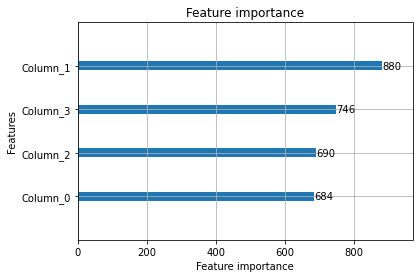

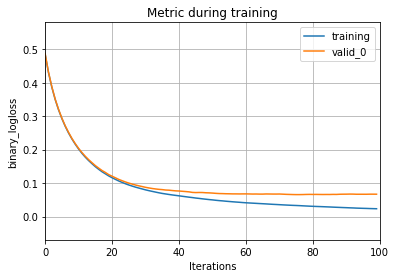

In [32]:
# Results Model LGBM Booster R/W

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_wines_rw_lgbmc.shape)
print(y_test.shape)

lgb.plot_importance(lgbmc)
lgb.plot_metric(lgbmc)
#lgb.plot_tree(lgbmc,figsize=(30,40))

print(metrics.classification_report(y_test,lgbmc.predict(X_test)))
print(confusion_matrix(y_test,pred_wines_rw_lgbmc))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_wines_rw_lgbmc)))
print('Training accuracy: {:.4f}'.format(lgbmc.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(lgbmc.score(X_test,y_test)))

In [33]:
# Model: lightgbm.Booster Label

X = wines.iloc[:, lambda df: [1, 4, 5, 10]]#[:,:-3]
var_names = X.columns
y = np.array(wines['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.quality_label)

rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)


lgbmc = lgb.LGBMClassifier(learning_rate=0.09,max_depth=1000,random_state=42, n_estimators=35)
lgbmc.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)], verbose=20,eval_metric='logloss')

pred_wines_label_lgbmc= lgbmc.predict(X_test)



[20]	training's multi_logloss: 0.770419	valid_0's multi_logloss: 0.832311


C:\Users\jspad\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Counter({'medium': 2552, 'low': 2146, 'high': 1149}) Counter({'medium': 284, 'low': 238, 'high': 128})
Features: ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'alcohol']
(650,)
(650,)
              precision    recall  f1-score   support

        high       0.63      0.44      0.52       128
         low       0.67      0.70      0.69       238
      medium       0.59      0.65      0.62       284

    accuracy                           0.63       650
   macro avg       0.63      0.60      0.61       650
weighted avg       0.63      0.63      0.63       650

[[ 56  14  58]
 [  2 167  69]
 [ 31  67 186]]
Cohen-Kappa score:  0.40480713699504545
Training accuracy: 0.6937
Testing accuracy: 0.6292


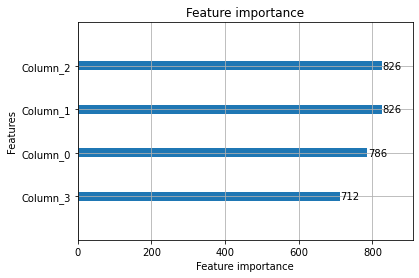

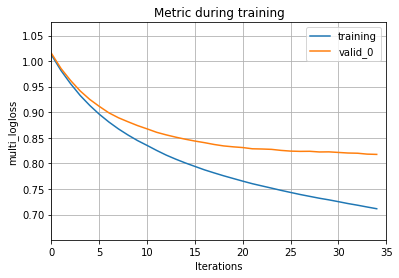

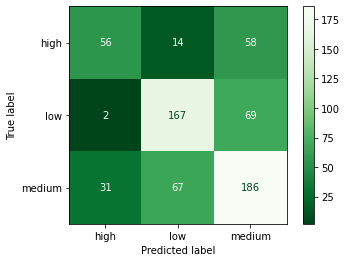

In [34]:
#Results Model LGBM Booster Label

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_wines_label_lgbmc.shape)
print(y_test.shape)

lgb.plot_importance(lgbmc)
lgb.plot_metric(lgbmc)
metrics.plot_confusion_matrix(lgbmc,X_test,y_test,cmap='Greens_r')
#lgb.plot_tree(lgbmc,figsize=(30,40))

print(metrics.classification_report(y_test,lgbmc.predict(X_test)))
print(confusion_matrix(y_test,pred_wines_label_lgbmc))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_wines_label_lgbmc)))
print('Training accuracy: {:.4f}'.format(lgbmc.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(lgbmc.score(X_test,y_test)))

In [35]:
# Model: lightgbm.Booster Label RED

X = red_df.iloc[:, lambda df: [1, 4, 5, 10]]#[:,:-3]
var_names = X.columns
y = np.array(red_df['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=red_df.quality_label)

rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)


lgbmc = lgb.LGBMClassifier(learning_rate=0.09,max_depth=10,random_state=42, n_estimators=30)
lgbmc.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)])#, verbose=20,eval_metric='logloss')

pred_red_label_lgbmc= lgbmc.predict(X_test)

[1]	training's multi_logloss: 0.940768	valid_0's multi_logloss: 0.959698
[2]	training's multi_logloss: 0.897734	valid_0's multi_logloss: 0.93278
[3]	training's multi_logloss: 0.860271	valid_0's multi_logloss: 0.908104
[4]	training's multi_logloss: 0.829128	valid_0's multi_logloss: 0.891039
[5]	training's multi_logloss: 0.802243	valid_0's multi_logloss: 0.875609
[6]	training's multi_logloss: 0.778831	valid_0's multi_logloss: 0.865374
[7]	training's multi_logloss: 0.757917	valid_0's multi_logloss: 0.856702
[8]	training's multi_logloss: 0.737781	valid_0's multi_logloss: 0.849706
[9]	training's multi_logloss: 0.719556	valid_0's multi_logloss: 0.842154
[10]	training's multi_logloss: 0.702783	valid_0's multi_logloss: 0.835882
[11]	training's multi_logloss: 0.687099	valid_0's multi_logloss: 0.8293
[12]	training's multi_logloss: 0.672878	valid_0's multi_logloss: 0.823829
[13]	training's multi_logloss: 0.658775	valid_0's multi_logloss: 0.819569
[14]	training's multi_logloss: 0.646214	valid_0's 

Counter({'low': 670, 'medium': 574, 'high': 195}) Counter({'low': 74, 'medium': 64, 'high': 22})
Features: ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'alcohol']
(160,)
(160,)
              precision    recall  f1-score   support

        high       0.42      0.36      0.39        22
         low       0.66      0.80      0.72        74
      medium       0.58      0.47      0.52        64

    accuracy                           0.61       160
   macro avg       0.55      0.54      0.54       160
weighted avg       0.60      0.61      0.60       160

[[ 8  6  8]
 [ 1 59 14]
 [10 24 30]]
Cohen-Kappa score:  0.3397956510348442
Training accuracy: 0.8304
Testing accuracy: 0.6062


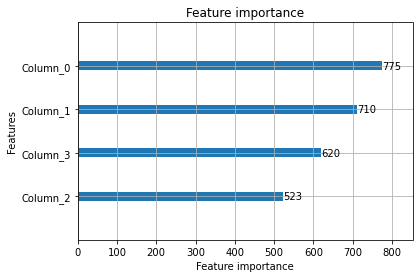

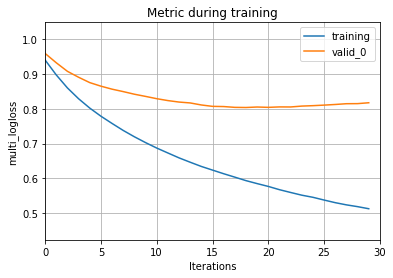

In [36]:
#Results Model LGBM Booster Label RED

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_red_label_lgbmc.shape)
print(y_test.shape)

lgb.plot_importance(lgbmc)
lgb.plot_metric(lgbmc)
#lgb.plot_tree(lgbmc,figsize=(30,40))

print(metrics.classification_report(y_test,lgbmc.predict(X_test)))
print(confusion_matrix(y_test,pred_red_label_lgbmc))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_red_label_lgbmc)))
print('Training accuracy: {:.4f}'.format(lgbmc.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(lgbmc.score(X_test,y_test)))

In [37]:
# Model: lightgbm.Booster Label White

X = white_df.iloc[:, lambda df: [1, 3, 4, 5, 10]]#[:, lambda df: [3, 5, 7, 10]]#[:, lambda df: [1, 2, 3, 4, 5, 8, 9, 10]]#[:,:-3]##
var_names = X.columns
y = np.array(white_df['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=white_df.quality_label)

rs=RobustScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

lgbmc = lgb.LGBMClassifier(boosting_type='gbdt',learning_rate=0.09,max_depth=-1,random_state=42, n_estimators=20)
lgbmc.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)])#, verbose=20,eval_metric='logloss')

pred_white_label_lgbmc= lgbmc.predict(X_test)

[1]	training's multi_logloss: 1.01377	valid_0's multi_logloss: 1.0217
[2]	training's multi_logloss: 0.977924	valid_0's multi_logloss: 0.992494
[3]	training's multi_logloss: 0.947286	valid_0's multi_logloss: 0.969258
[4]	training's multi_logloss: 0.921018	valid_0's multi_logloss: 0.949
[5]	training's multi_logloss: 0.897853	valid_0's multi_logloss: 0.931152
[6]	training's multi_logloss: 0.877923	valid_0's multi_logloss: 0.91685
[7]	training's multi_logloss: 0.859588	valid_0's multi_logloss: 0.904314
[8]	training's multi_logloss: 0.841938	valid_0's multi_logloss: 0.89345
[9]	training's multi_logloss: 0.826655	valid_0's multi_logloss: 0.882725
[10]	training's multi_logloss: 0.813204	valid_0's multi_logloss: 0.87317
[11]	training's multi_logloss: 0.800481	valid_0's multi_logloss: 0.865859
[12]	training's multi_logloss: 0.788662	valid_0's multi_logloss: 0.859193
[13]	training's multi_logloss: 0.778023	valid_0's multi_logloss: 0.853698
[14]	training's multi_logloss: 0.767781	valid_0's multi_

Counter({'medium': 1758, 'low': 1312, 'high': 848}) Counter({'medium': 440, 'low': 328, 'high': 212})
Features: ['volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'alcohol']
(980,)
(980,)
              precision    recall  f1-score   support

        high       0.63      0.42      0.50       212
         low       0.69      0.62      0.65       328
      medium       0.57      0.70      0.63       440

    accuracy                           0.61       980
   macro avg       0.63      0.58      0.59       980
weighted avg       0.62      0.61      0.61       980

[[ 88   9 115]
 [  3 204 121]
 [ 49  83 308]]
Cohen-Kappa score:  0.3733509234828496
Training accuracy: 0.7070
Testing accuracy: 0.6122


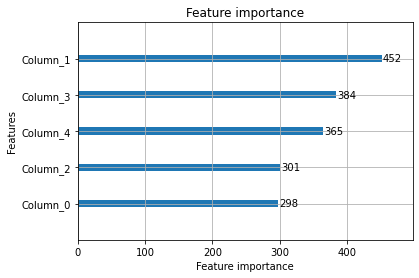

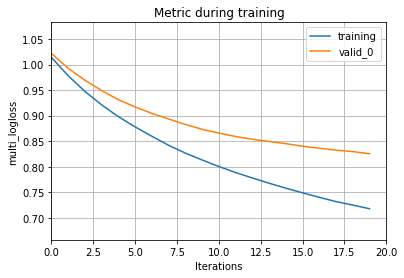

In [38]:
#Results Model LGBM Booster Label White

print(Counter(y_train), Counter(y_test))
print('Features:', list(var_names))

print(pred_white_label_lgbmc.shape)
print(y_test.shape)

lgb.plot_importance(lgbmc)
lgb.plot_metric(lgbmc)
#lgb.plot_tree(lgbmc,figsize=(30,40))

print(metrics.classification_report(y_test,lgbmc.predict(X_test)))
print(confusion_matrix(y_test,pred_white_label_lgbmc))

print("Cohen-Kappa score: ", (cohen_kappa_score(y_test,pred_white_label_lgbmc)))
print('Training accuracy: {:.4f}'.format(lgbmc.score(X_train,y_train)))
print('Testing accuracy: {:.4f}'.format(lgbmc.score(X_test,y_test)))

In [39]:
# Prova viulenza

# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import make_moons, make_circles, make_classification
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# names = ["Nearest Neighbors","Linear SVM","RBF SVM","Gaussian Process","Decision Tree","Random Forest","Neural Net","AdaBoost","Naive Bayes","QDA",]

# classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
#     DecisionTreeClassifier(max_depth=5),
#     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#     MLPClassifier(alpha=1, max_iter=1000),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
# ]

# X = wines.iloc[:, lambda df: [3, 5, 7, 10]]
# var_names = X.columns
# y = np.array(wines['wine_type'])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.wine_type)


# figure = plt.figure(figsize=(27, 9))
# i = 1
# # iterate over datasets
# for ds_cnt, ds in enumerate(wines):
#     # preprocess dataset, split into training and test part
#     rs=RobustScaler()
#     X_train = rs.fit_transform(X_train)
#     X_test = rs.fit_transform(X_test)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=wines.wine_type)
   

#     # x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
#     # y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
#     # xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#     # just plot the dataset first
#     cm = plt.cm.RdBu
#     cm_bright = ListedColormap(["#FF0000", "#0000FF"])
#     ax = plt.subplot(len(wines), len(classifiers) + 1, i)
#     if ds_cnt == 0:
#         ax.set_title("Input data")
#     # Plot the training points
#     ax.scatter(X_train, X_train, c=y_train, cmap=cm_bright, edgecolors="k")
#     # Plot the testing points
#     ax.scatter(
#         X_test, X_test, c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
#     )
#     ax.set_xlim(xx.min(), xx.max())
#     ax.set_ylim(yy.min(), yy.max())
#     ax.set_xticks(())
#     ax.set_yticks(())
#     i += 1

#     # iterate over classifiers
#     for name, clf in zip(names, classifiers):
#         ax = plt.subplot(len(wines), len(classifiers) + 1, i)
#         clf.fit(X_train, y_train)
#         score = clf.score(X_test, y_test)

#         # Plot the decision boundary. For that, we will assign a color to each
#         # point in the mesh [x_min, x_max]x[y_min, y_max].
#         if hasattr(clf, "decision_function"):
#             Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#         else:
#             Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

#         # Put the result into a color plot
#         Z = Z.reshape(xx.shape)
#         ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

#         # Plot the training points
#         ax.scatter(
#             X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
#         )
#         # Plot the testing points
#         ax.scatter(
#             X_test[:, 0],
#             X_test[:, 1],
#             c=y_test,
#             cmap=cm_bright,
#             edgecolors="k",
#             alpha=0.6,
#         )

#         ax.set_xlim(xx.min(), xx.max())
#         ax.set_ylim(yy.min(), yy.max())
#         ax.set_xticks(())
#         ax.set_yticks(())
#         if ds_cnt == 0:
#             ax.set_title(name)
#         ax.text(
#             xx.max() - 0.3,
#             yy.min() + 0.3,
#             ("%.2f" % score).lstrip("0"),
#             size=15,
#             horizontalalignment="right",
#         )
#         i += 1

# plt.tight_layout()
# plt.show()

In [40]:
#pip install lightgbm

In [41]:
#%reset